## HR_Employee_Attrition Analysis

#### Data Preparation and Cleaning
- Reading the csv file and doing initial statistical analysis (shape, values etc).
- Data Preprocessing: Reading the uniques values for each column and removing those which won't be significant in the analysis further.
- Create new dataframe to proceed with the analysis further.

In [45]:
# Importing Libraries

import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [46]:
# Read of csv dataset

hr_df = pd.read_csv("C:/Users/Platini/Desktop/Dataset/Merit_Internship/Project 3 - HR Analytics/HR-Employee-Attrition.csv")
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Columns in the dataset

hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Information about the dataset

hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Knowing about the dataset

hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Transpose of the describe data

hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [7]:
# Checking if the dataset have null value or not

hr_df.isnull().head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# checking the number of null values our dataset has

hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

From below, we are counting the unique values of all the columns. This helped us decide on the following columns; EmployeeNumber, EmployeeCount, StandardHour, and Over 18 can be removed from the final data frame. EmployeeNumber does not have any impact in analysis as its a unique key for each record; EmployeeCount, StandardHour, and Over 18 doesn't have enough data to do analysis

In [9]:
for i in hr_df:
    print("No of Values for {} is {}".format(i,str(hr_df[i].nunique())))

No of Values for Age is 43
No of Values for Attrition is 2
No of Values for BusinessTravel is 3
No of Values for DailyRate is 886
No of Values for Department is 3
No of Values for DistanceFromHome is 29
No of Values for Education is 5
No of Values for EducationField is 6
No of Values for EmployeeCount is 1
No of Values for EmployeeNumber is 1470
No of Values for EnvironmentSatisfaction is 4
No of Values for Gender is 2
No of Values for HourlyRate is 71
No of Values for JobInvolvement is 4
No of Values for JobLevel is 5
No of Values for JobRole is 9
No of Values for JobSatisfaction is 4
No of Values for MaritalStatus is 3
No of Values for MonthlyIncome is 1349
No of Values for MonthlyRate is 1427
No of Values for NumCompaniesWorked is 10
No of Values for Over18 is 1
No of Values for OverTime is 2
No of Values for PercentSalaryHike is 15
No of Values for PerformanceRating is 2
No of Values for RelationshipSatisfaction is 4
No of Values for StandardHours is 1
No of Values for StockOptionL

In [10]:
hr_new_df=hr_df.copy()
hr_new_df.drop([ 'EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18'], axis="columns", inplace=True)

In [11]:
hr_new_df.shape

(1470, 31)

In [12]:
import jovian

<IPython.core.display.Javascript object>

In [13]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "amponsahm7/hr" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/amponsahm7/hr


'https://jovian.com/amponsahm7/hr'

### Exploratory Data Analysis and Visualization

- Find patterns of data through visualization and reveal the hidden trends from data. 

- Using both matplotlib and seaborn library to visualize data.

- Finding relationships between features using bar graph, histograms, boxplots, heatmaps etc.

- Analysing both the numerical and the categorical columns separately

In [47]:
# Data Visulization
import matplotlib

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


Visualizing all the columns which are integer datatype and has unique values less than 30. We will be creating a new array with only these features and then visualize it all together. This step has helped us optimize our process and limit manual effort, as we are not looking at each of the columns manually.

PS: I have taken 30 , just as an estimated number.

In [48]:
num_col=[]
for i in hr_new_df.columns:
    if(hr_new_df[i].dtypes!=object and hr_new_df[i].nunique()<30):
        print(i, hr_new_df[i].unique())
        num_col.append(i)
#print(num_col)

DistanceFromHome [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Education [2 1 4 3 5]
EnvironmentSatisfaction [2 3 4 1]
JobInvolvement [3 2 4 1]
JobLevel [2 1 3 4 5]
JobSatisfaction [4 2 3 1]
NumCompaniesWorked [8 1 6 9 0 4 5 2 7 3]
PercentSalaryHike [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
PerformanceRating [3 4]
RelationshipSatisfaction [1 4 2 3]
StockOptionLevel [0 1 3 2]
TrainingTimesLastYear [0 3 2 5 1 4 6]
WorkLifeBalance [1 3 2 4]
YearsInCurrentRole [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
YearsSinceLastPromotion [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
YearsWithCurrManager [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]


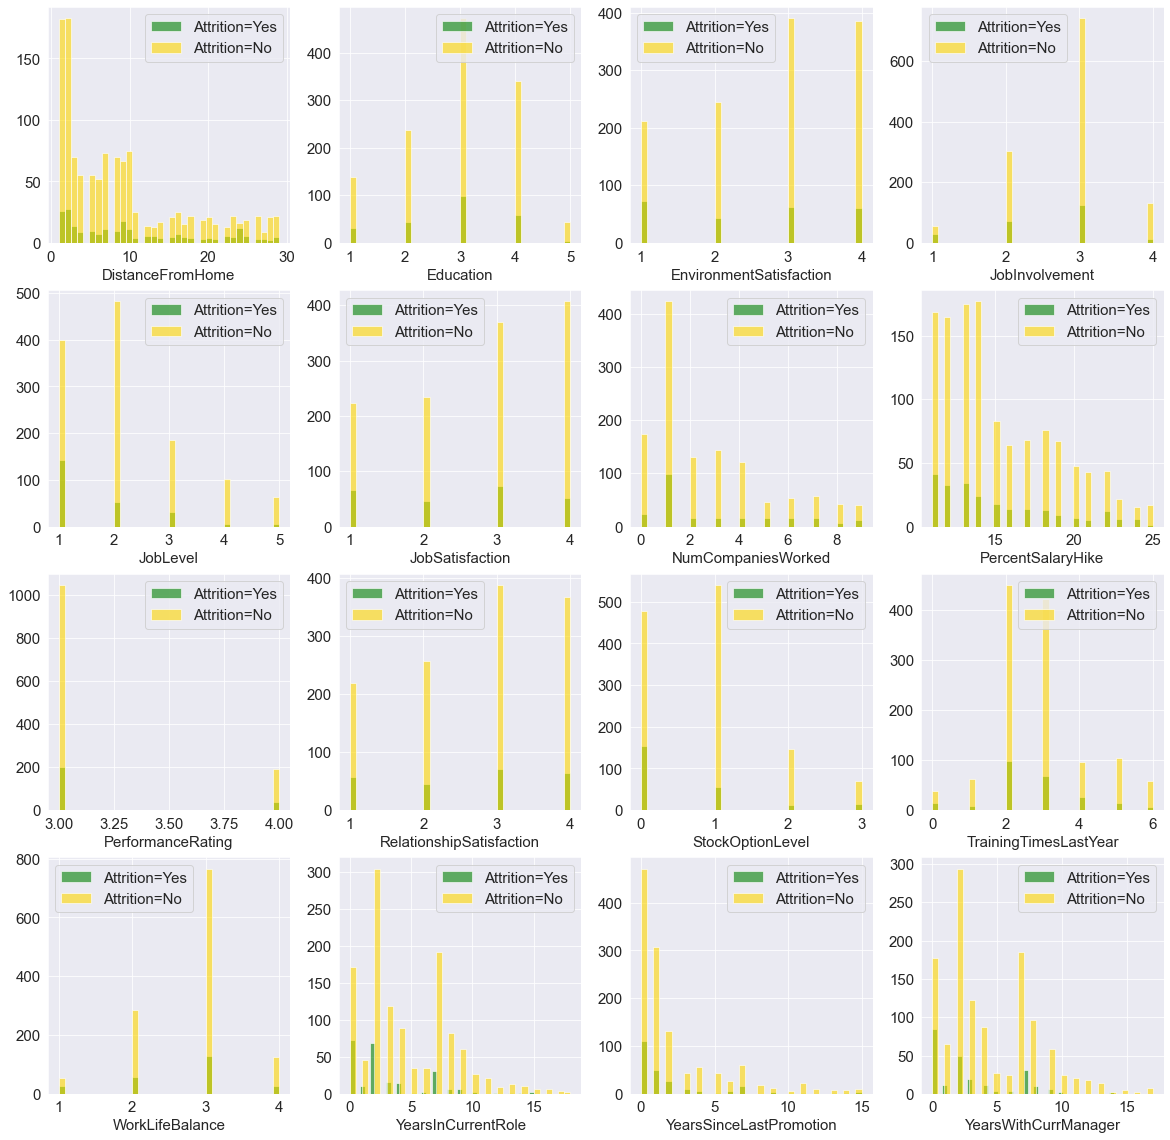

In [49]:
plt.figure(figsize=(20,20))
for i, column in enumerate(num_col,1):
    plt.subplot(4,4,i)
    hr_new_df[hr_new_df['Attrition']=='Yes'][column].hist(bins=36,color='green',label="Attrition=Yes",alpha=0.6)
    hr_new_df[hr_new_df['Attrition']=='No'][column].hist(bins=36,color='gold',label="Attrition=No",alpha=0.6)
    plt.xlabel(column)
    plt.legend()

From the graph, environment satisfaction, job satisfaction, performance rating and relationship satisfactions don't have much impact on the attrition of employees. While percentage salary hike, years since last promotion, Job Level etc have an impact on attrition. We will study it in detail later in this notebook.

Same is done above, now we are visualizing all the columns which are of object datatype and has unique values less than 30. We will be creating a new array with only these features and then visualize it all together.

In [50]:
cat_col=[]
for i in hr_new_df.columns:
    if(hr_new_df[i].dtypes==object and hr_new_df[i].nunique()<30):
        print(i, hr_new_df[i].unique())
        cat_col.append(i)

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
OverTime ['Yes' 'No']
Generation ['Generation X' 'Millenials' 'Boomers']


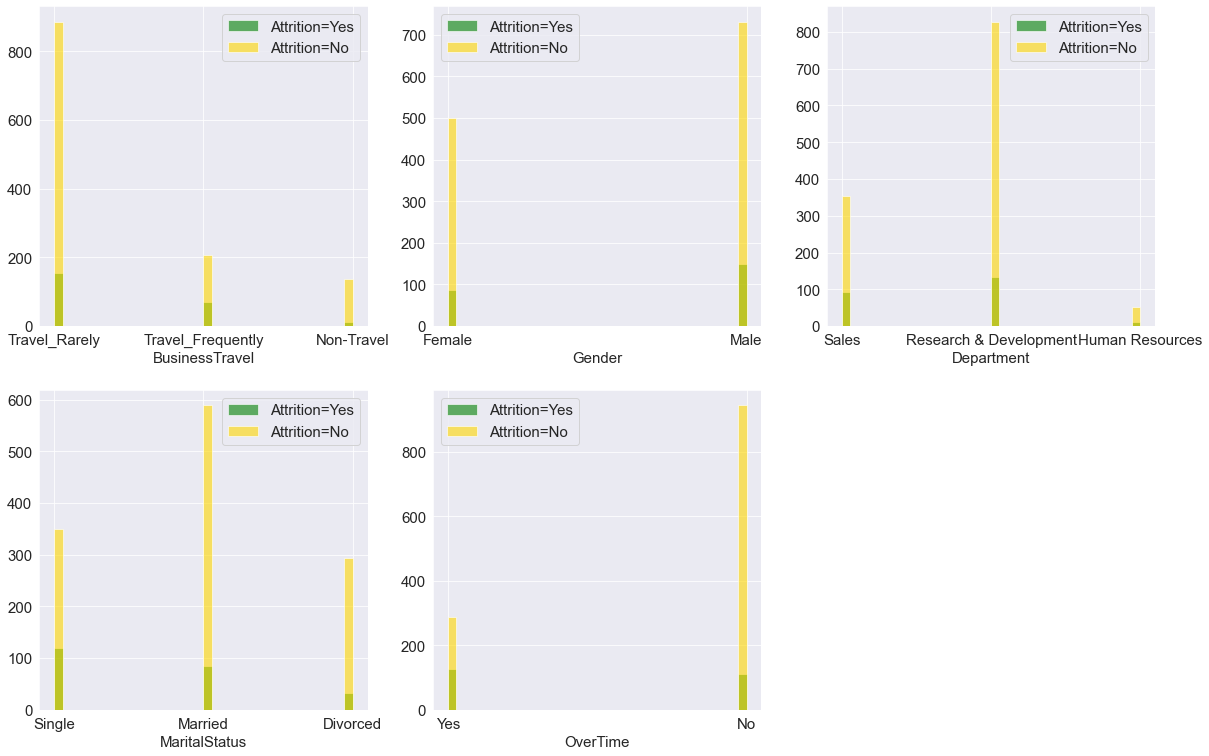

In [51]:
plt.figure(figsize=(20,20))
cat_col_new= ['BusinessTravel','Gender','Department','MaritalStatus','OverTime']
for i, column in enumerate(cat_col_new,1):
    plt.subplot(3,3,i)
    hr_new_df[hr_new_df['Attrition']=='Yes'][column].hist(bins=36,color='green',label="Attrition=Yes",alpha=0.6)
    hr_new_df[hr_new_df['Attrition']=='No'][column].hist(bins=36,color='gold',label="Attrition=No",alpha=0.6)
    plt.xlabel(column)
    plt.legend()

All the dimensions shown above seems to have an impact on attrition. OverTime graph clearly shows that associates who do over time have higher attrition rate. Similar observation can be made from Marital Status, it shows single employees have higher attrition rate. We will study the other dimensions in this notebook. Let's go ahead.

Exploring the relation between age and attrition of employes using stacked histogram

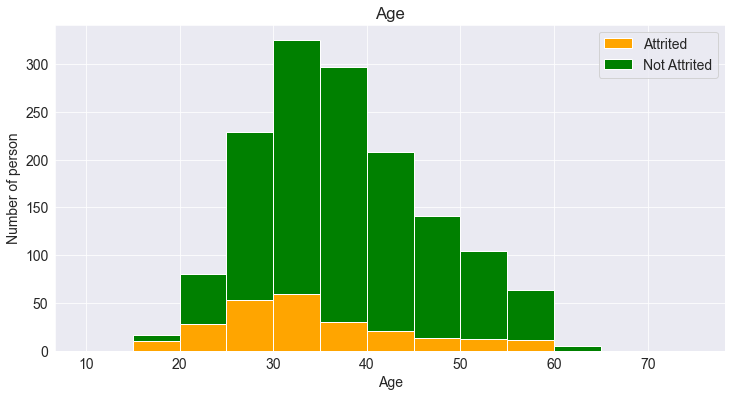

In [19]:
Attr_yes_df=hr_df[hr_df['Attrition']=='Yes']
Attr_no_df=hr_df[hr_df['Attrition']=='No']

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Number of person')

plt.hist([Attr_yes_df.Age,Attr_no_df.Age], bins=np.arange(10,80,5), color=['orange','green'],stacked=True);
plt.legend(['Attrited', 'Not Attrited']);

### Created a heatmap to understand the correlation between all the numerical features. It shows:

- Job Level and Monthly Income has strong correlation.
- Higher the performance rating, higher the salary hike.
- Total Working years and YearsAtCompany are highly correlated.
- Yearsatcompany and yearswithcurrent manager is highly correlated.
- There is very low correlation between number of companies worked and total working years.

<AxesSubplot:>

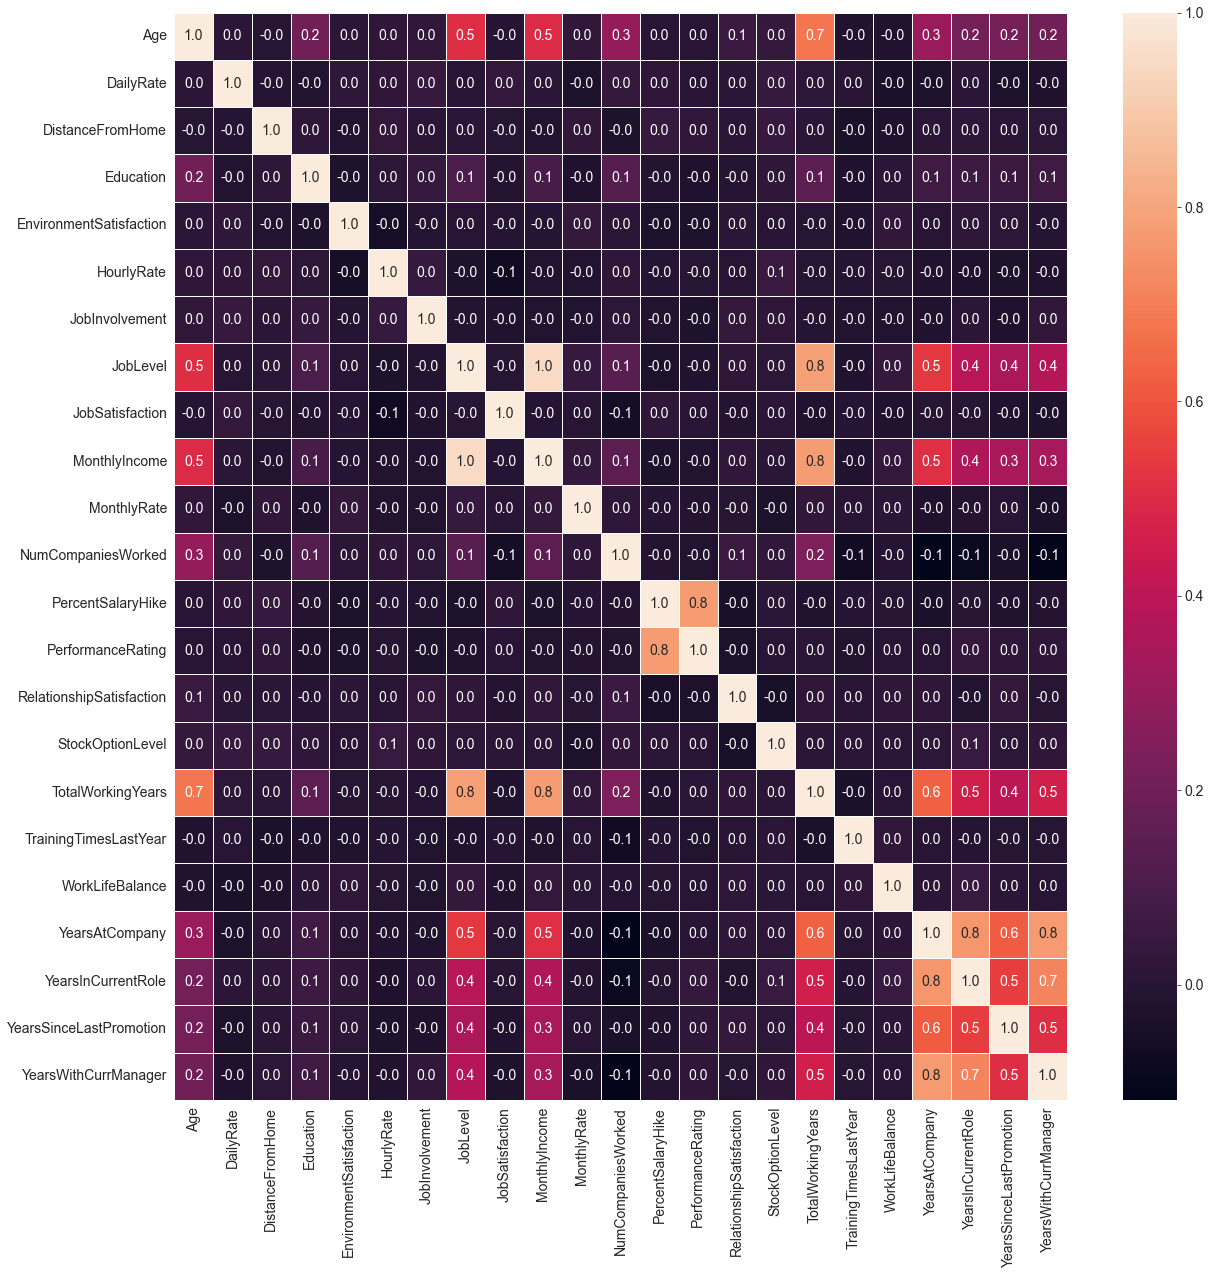

In [20]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(hr_new_df.corr(),annot=True,linewidth=.5,fmt='.1f')

Exploring the employees distribution based on marital status using bar graph.

In [21]:
mar_stat=hr_new_df['MaritalStatus'].value_counts()

Text(0.5, 1.0, 'Marital Status')

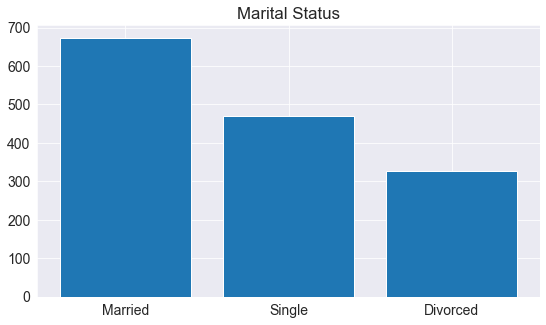

In [22]:
plt.bar(mar_stat.index,mar_stat)
plt.title('Marital Status')

Let us save and upload our work to Jovian before continuing

In [23]:
import jovian

In [24]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "amponsahm7/hr" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/amponsahm7/hr


'https://jovian.com/amponsahm7/hr'

## Asking and Answering Questions
Have come up with few questions to do my analysis around attrition reasons. I have also tried using all the learned concepts to acieve the same.

### Q1: Which department and job role has seen most attrition?

In [25]:
Attr_yes_df=hr_df[hr_df['Attrition']=='Yes']
Attr_no_df=hr_df[hr_df['Attrition']=='No']

dept_count_yes=Attr_yes_df['EducationField'].value_counts()
dept_count_no=Attr_no_df['EducationField'].value_counts()
job_role_yes=Attr_yes_df['JobRole'].value_counts()
job_role_no=Attr_no_df['JobRole'].value_counts()

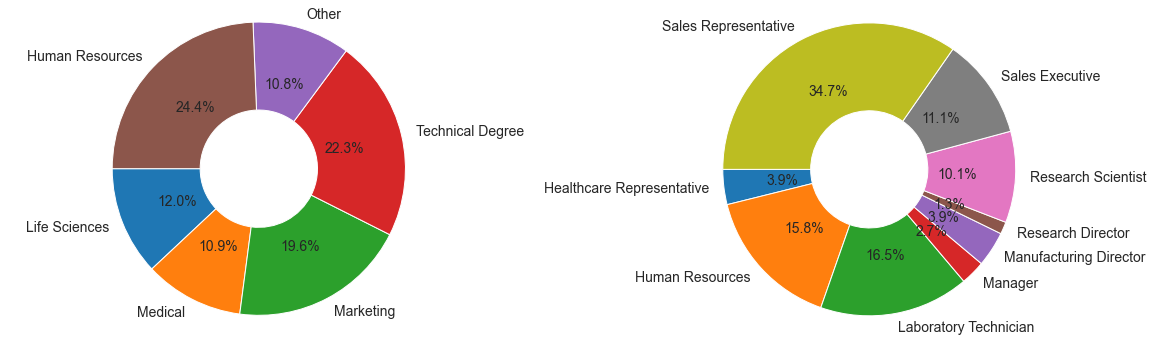

In [26]:
fig, axes = plt.subplots(1,2, figsize=(20, 6))

# Pie wedgeprops with width being the donut thickness
axes[0].pie((dept_count_yes*100/dept_count_no), wedgeprops=dict(width=0.6), labels=(dept_count_yes/dept_count_no).index,autopct='%1.1f%%', startangle=180);
axes[0].text(0., 0., '', horizontalalignment='center', verticalalignment='center')
axes[0].axis('equal')

#plt.show()

axes[1].pie((job_role_yes*100/job_role_no), wedgeprops=dict(width=0.6), labels=(job_role_yes/job_role_no).index,autopct='%1.1f%%', startangle=180);
axes[1].text(0., 0., '', horizontalalignment='center', verticalalignment='center')
axes[1].axis('equal')
plt.show()

I have displayed the rate of attrition across department and job role. As we can see, Human Resources and Technical Degree had most attrition rate. While Sales representative job role was most impacted by attrition. Manager, Research Director and Manufacturing Director had comparatively lesser attrition rate. I have calculated attrition rate by dividing data from attrited employees upon non attrited employees.

### Q2: What is the relation between gender wise job satisfaction for all the employees?.

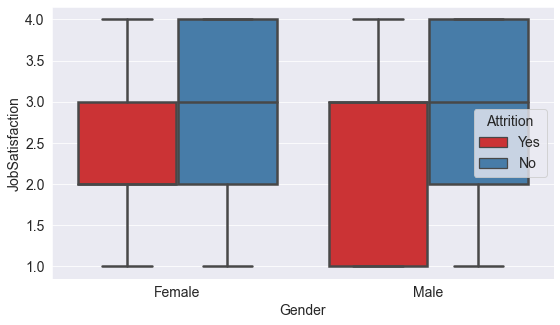

In [27]:
ax=sns.boxplot(x=hr_new_df["Gender"],y=hr_new_df['JobSatisfaction'],hue=hr_new_df['Attrition'],palette="Set1",linewidth=2.5)

For individuals who stayed in the organization,distribution of job satisfaction is same irrespective of gender. While amongst those who left, females had lower job satisfaction.

### Q3: What is the average no of companies worked previously?

In [28]:
def genfunc(age2):
    gen=[]
    if (age2)<37:
        gen='Millenials'
    elif age2>=37 and age2<54:
        gen='Generation X'
    elif age2>=54 and age2<73:
        gen='Boomers'
    else:
        gen='Silent'
    return(gen)
hr_new_df['Generation']=hr_new_df['Age'].apply(genfunc)

In [29]:
gen_df=hr_new_df.groupby('Generation')['NumCompaniesWorked'].mean()
gen_df

Generation
Boomers         4.218391
Generation X    3.278632
Millenials      2.097744
Name: NumCompaniesWorked, dtype: float64

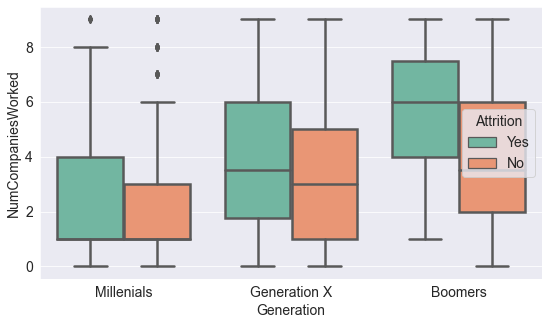

In [30]:
ax=sns.boxplot(x=hr_new_df["Generation"],y=hr_new_df['NumCompaniesWorked'],hue=hr_new_df['Attrition'],palette="Set2",linewidth=2.5,order=['Millenials','Generation X','Boomers'])

Created a column called generation based on age of employees. This was done to understand if there is a difference in behaviour of young versus old generation employees. It currently shows lesser number for millenials compared to the boomers as they obviously are younger. In future, I would be studying the attrition rate of the generation category to get a better picture.

### Q4: Does income parity across department have an impact on attrition?


In [31]:
inc=Attr_yes_df.groupby(['Department'])['MonthlyIncome'].mean()

inc_att=Attr_no_df.groupby(['Department'])['MonthlyIncome'].mean()


Text(0.5, 1.0, 'Not Attrited Employees')

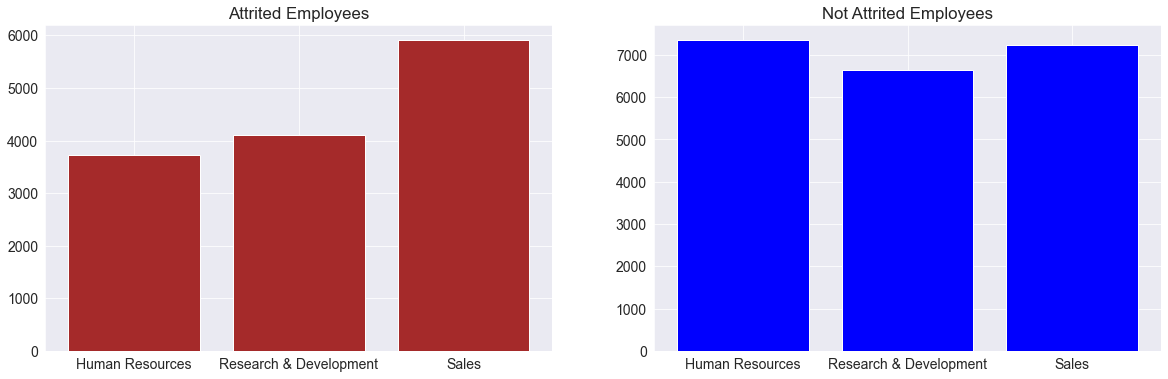

In [32]:
fig, axes = plt.subplots(1,2, figsize=(20, 6))
axes[0].bar(inc.index, inc, color='brown')
axes[0].set_title('Attrited Employees')
axes[1].bar(inc_att.index, inc_att, color='blue')
axes[1].set_title('Not Attrited Employees')

As we can see, attrited employess of the same departments have lesser monthly income than employees who haven't attrited. Human Resources department has a difference of almost double monthly pay.While, Sales department doesnt have much significant pay parity.

### Q5: Does promotion affect attrition?

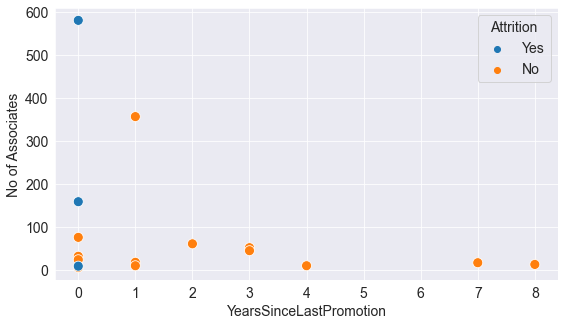

In [33]:
yearpromo_count_df=hr_new_df['YearsSinceLastPromotion'].value_counts()
sns.scatterplot(hr_new_df.YearsSinceLastPromotion, yearpromo_count_df, hue=hr_new_df.Attrition, s=100)
plt.xlabel("YearsSinceLastPromotion")
plt.ylabel("No of Associates");

As we can see in the above scatter plot, all the employees who attrited have got promotion in less than 1 year duration. While employees who haven't got promotion are still with the company. It shows the pattern that employees maybe wait in a company till they get promotion and start looking for opportunities ouside as soon as they get promoted.

### Q6: What is the max percentage hike for employee?

In [34]:
hr_new_df.PercentSalaryHike.value_counts().max()

210

### Q7: What is the OverTime rate of employees?

In [35]:
hr_new_df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [36]:
OverTime_rate=416/hr_new_df.OverTime.count() * 100
OverTime_rate

28.29931972789116

##### So the overtime rate is 28.29%

### Q8: What is the classification of employees according to the business travel?

In [37]:
hr_new_df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

So most of the employees of the company travel rarely.

### Q9: What is the diversification of jobrole based on gender?

In [38]:
#percentage of males and females
gender_ratio=hr_new_df.Gender.value_counts() * 100 / hr_new_df.Gender.count()
gender_ratio

Male      60.0
Female    40.0
Name: Gender, dtype: float64

In [39]:
jobrole_gender_df=hr_df.groupby(['JobRole','Gender'],as_index=False).count()
jobrole_gender_df

,JobRole,Gender,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Healthcare Representative,Female,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
1,Healthcare Representative,Male,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
2,Human Resources,Female,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
3,Human Resources,Male,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
4,Laboratory Technician,Female,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
5,Laboratory Technician,Male,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174
6,Manager,Female,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
7,Manager,Male,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
8,Manufacturing Director,Female,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
9,Manufacturing Director,Male,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73


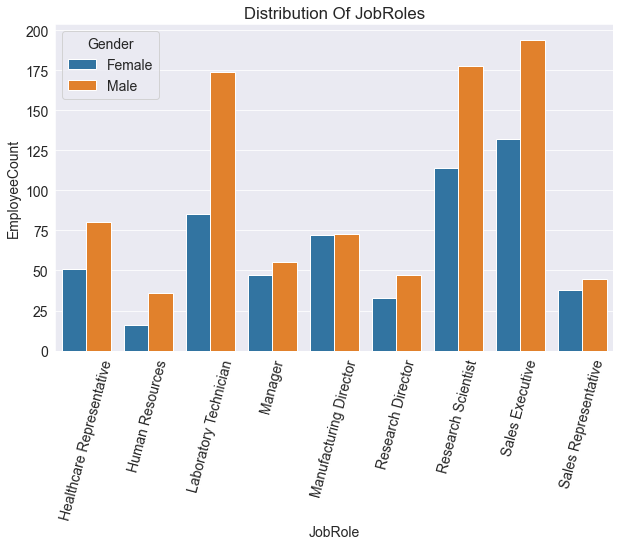

In [40]:
plt.figure(figsize=(10,6));
sns.barplot(x='JobRole',y='EmployeeCount',hue='Gender',data=jobrole_gender_df);
plt.xticks(rotation=75);
plt.title('Distribution Of JobRoles');

In each Jobrole, the number of males are higher than females, one of the reason behind this is percentage of males in organisation is 60. Huge difference is observed in jobroles of Laboratory Technician,Research Scientist, Sales Executive,whereas for Manufacturing Director there are equal number of males and females.

### Q10: What is the maximum monthly income of male and female employee?

In [41]:
hr_df.groupby("Gender").MonthlyRate.max()

Gender
Female    26997
Male      26999
Name: MonthlyRate, dtype: int64

### Q11: How many employees have worked with more than 5 companies?

In [42]:
num_com_greater5=hr_df[hr_df.NumCompaniesWorked>=6].count()
num_com_greater5.NumCompaniesWorked

245

There are 245 employees in the organisation who have worked for more than 5 companies.

Let us save and upload our work to Jovian before continuing.

In [43]:
import jovian

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "amponsahm7/hr" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/amponsahm7/hr


'https://jovian.com/amponsahm7/hr'

## Inferences and Conclusion

- Correlation graph showed correlation between different features. It showed how performance rating & hike is highly correlated.
- Sales Representative Job Role has the highest attrition rate.
- Most employees leave job after getting promotion.
- Employees of same department who get attrited have lesser monthly income compared to those who did not get attrited
- Promotion impacts attrition rate: Employees who get promoted leaves sooner that those who didnt get promotion.